# Digital Signal Processing - 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, rfft, fftshift

%matplotlib inline

## Deterministic Signals

In the world there are many signals of various shapes, however, in problems of digital and analog processing, well-known signals are often used - of harmonic shape, modulated (in amplitude, frequency or phase). As you know, a signal of any shape can be represented as a set of harmonic signals of different frequencies and amplitudes (i.e. a set of spectral samples). We can say that the more complex the signal, the more spectral readings are required to represent it. In particular, to represent signals with sharp changes in shape, high frequencies of the spectrum are required, and for “smooth” signals and slowly changing processes, high frequencies are not required and do not contribute to the resulting signal (and its spectrum).

### Harmonic signal

The harmonic signal is given by the equation:

$ s (t) = A \cdot cos (2 \pi ft + \phi) $,

where * A * is the oscillation amplitude, f is the signal frequency, φ is the initial phase.

Comprehensive recording of such a signal:

$ s = A \cdot e ^ {j (2 \pi ft + \phi)} $,

where *j* is the complex unit. Often expressed as $ j = \sqrt-1 $

Below is a graph of the harmonic signal for various parameters of the frequency value. Amplitude = 1, initial phase = 0 (constants).

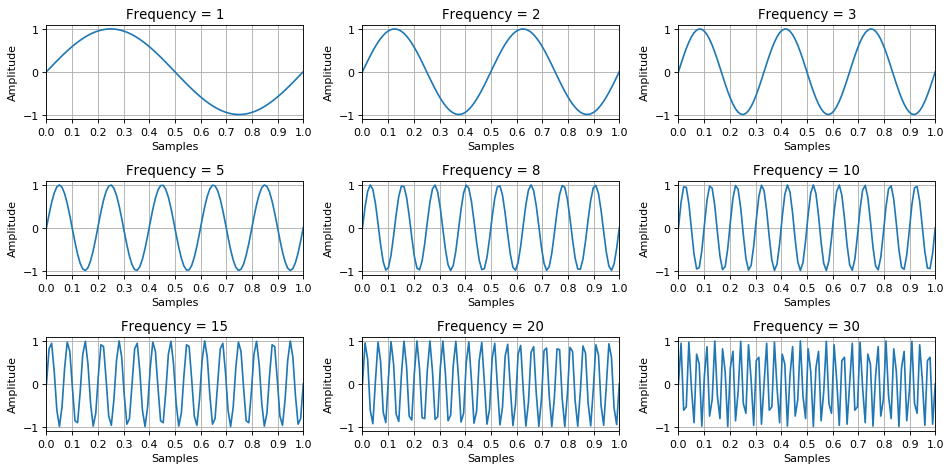

In [2]:
n = 100
t = np.linspace(0, 1, n, endpoint=True)

# list of frequencies
f_list = np.array([1, 2, 3, 5, 8, 10, 15, 20, 30])

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(f_list):
    plt.subplot(3, 3, i+1)
    plt.plot(t, np.sin(2*np.pi*freq*t))
    plt.title(f'Frequency = {freq}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.xlim([0, 1])
    plt.xticks(np.linspace(0, 1, 11, endpoint=True))
    plt.grid()
plt.tight_layout()

## Modulation

Despite the fact that modulation is inherent in analog vibrations, it is necessary to understand in what ways information messages can be transmitted. For digital signals, discrete oscillation modulation is called **manipulation** and will also be discussed in this section.

**Modulation** is the process of changing one or more signal parameters. A modulated signal is called a “carrier” (a modulated message is transmitted at the frequency of this signal). The information signal is called modulating. As a rule, the modulating signal is low-frequency, and the carrier signal is high-frequency. In the process of modulating the carrier signal, the spectrum of the modulating signal is transferred to the region of the carrier frequency. Harmonic signals can be modulated in time in amplitude, frequency and phase.

The electromagnetic field is transmitted in space using antennas, the size of which depends on the wavelength $ \lambda $, low-frequency information signals in many cases are simply physically impossible to transmit from the source to the receiver (huge antennas are required). In this regard, methods of modulation of high-frequency carrier oscillations are used.

### Amplitude Modulation

Amplitude modulation is a well-known way to change the waveform of an amplitude parameter. From the name it is obvious that the amplitude of such a signal varies in time. The law of amplitude change is arbitrary; in practice, harmonic modulation is often used.

The formula of the simplest harmonic AM signal:

$s(t) = A_c \cdot (1 + m \cdot cos(\omega_mt +\phi)) \cdot cos(\omega_сt)$, 

Where
- $ A_ {c} $ is the amplitude of the carrier oscillation,
- $ \omega_ {c} $ - frequency of the carrier signal,
- $ \omega_ {m} $ - frequency of the modulating (information) signal,
- $ \phi $ - the initial phase of the modulating signal,
- *m* - modulation coefficient.

Then, the radio signal consists of a carrier wave and two sidebands. From the name, it is obvious that the carrier frequency is the one at which the signal propagates. As a rule, this is a high frequency relative to the modulating frequency.

The modulating frequency, in turn, is low frequency. This is the frequency at which the information message is transmitted.

For the sinusoidal signal used as an example, the sidebands are sinusoidal signals and their frequencies are $\omega_{c}+\omega_{m}$ and $\omega_{c}-\omega_{m}$ . The spectrum of the AM signal is always symmetrical with respect to the center (carrier) frequency.

It is important to understand that the center frequency does not carry useful information, although it is called the “carrier”. A frequency value is embedded in this concept, relative to which information (modulating) signal frequencies are located.

Create an AM signal function:

In [3]:
def signal_am(amp=1.0, km=0.25, fc=10.0, fs=2.0, period=100):
    """
    Create Amplitude modulation (AM) signal

    Parameters
    ----------
    amp : float
        Signal magnitude
    km : float
        Modulation coeff: amplitude sensitivity 0 <= km < 1
    fc : float
        Carrier frequency
    fs : float
        Signal frequency
    period : integer
        Number of points for signal (same as period)
    """
    tt = 2.0 * np.pi * np.linspace(0, 1, period)
    return amp * (1 + km * np.cos(fs * tt)) * np.cos(fc * tt)

The graphs below show how the shape and spectrum of the AM signal changes when the parameter **carrier frequency** $ f_c $ changes:

As you can see, the spectrum of the AM signal consists of three components: the central one is the carrier, and the two side ones are modulating. When the carrier frequency changes, the entire AM signal is shifted in frequency.

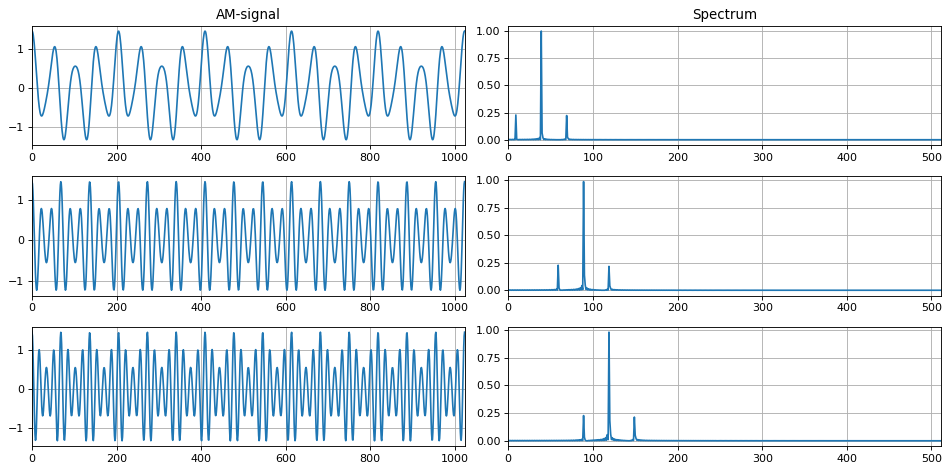

In [4]:
N = 1024

# Create AM-signal
fs = 15             # Modulation frequency
fc = [20, 45, 60]   # Carrier frequency

sig = [signal_am(amp=1.0, km=0.45, fc=i, fs=fs, period=N) for i in fc]

# Calculate FFT
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(fc):
    plt.subplot(len(fc), 2, 2*i+1)
    if i == 0:
        plt.title('AM-signal')
    plt.plot(sig[i])
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(fc), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

The graphs below show how the shape and spectrum of the AM signal changes when the parameter **of the frequency of the modulating oscillation** $ f_s $ changes:

As you can see, when the modulating frequency changes, the spectrum does not shift, but the distance between the center (carrier) frequency and the side (modulating) frequencies changes.

The width of the spectrum of the AM signal is equal to twice the frequency of the modulating signal.

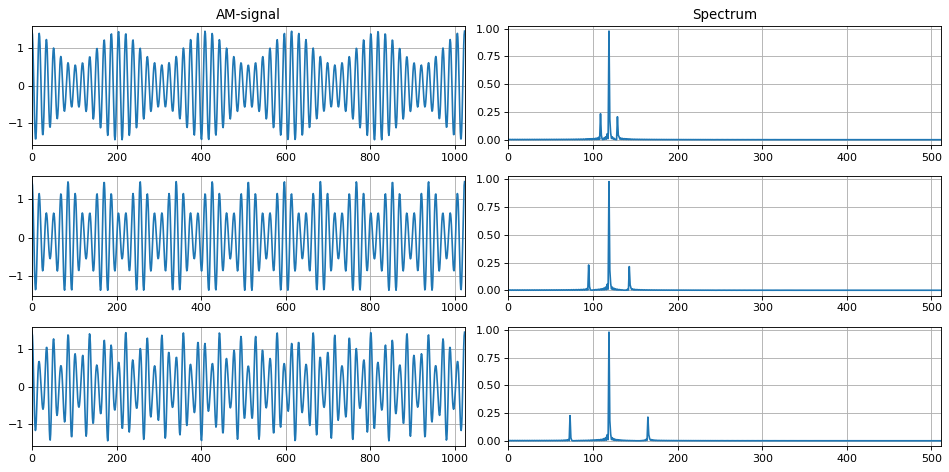

In [5]:
N = 1024
# Create AM-signal
fs = [5, 12, 23]    # Modulation frequency
fс = 60             # Carrier frequency

sig = [signal_am(amp=1.0, km=0.45, fc=fс, fs=i, period=N) for i in fs]

# Calculate FFT
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(fs):
    plt.subplot(len(fc), 2, 2*i+1)
    if i == 0:
        plt.title('AM-signal')
    plt.plot(sig[i])
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(fs), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Finally, we will see how the shape and spectrum of the AM signal changes when the parameter **modulation coefficient**  $ k_m $ changes:

As you can see, when the modulation coefficient changes, the signal spectrum remains in place. Only the level of the side components changes. Note that for $ k_m > 1 $, the so-called excessive modulation (overmodulation) occurs. The maximum value of the modulation coefficient at which there is no overmodulation of the AM signal $ k_m = 1 $.

The amplitude of the central harmonic is equal to the amplitude of the carrier oscillation: $ A_c = A_o $.

The amplitude of the side components is $ A_m = \frac {A_o \cdot m} {2} $

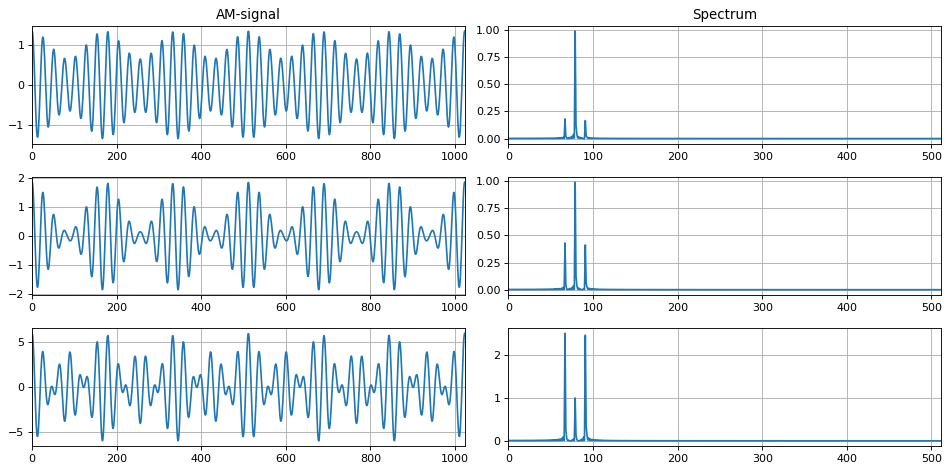

In [6]:
N = 1024
# Create AM-signal
fs = 6                  # Modulation frequency
fс = 40                 # Carrier frequency
km = [0.35, 0.85, 5]    # modulation coeff.

sig = [signal_am(amp=1.0, km=i, fc=fс, fs=fs, period=N) for i in km]

# Calculate FFT
sft = np.abs(rfft(sig, axis=1)) / N / 0.5

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(km):
    plt.subplot(len(km), 2, 2*i+1)
    if i == 0:
        plt.title('AM-signal')
    plt.plot(sig[i])
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(km), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Among the class of signals with amplitude modulation, there are a number of signals that make better use of the energy characteristics of the signal. For example, signals **with suppressed carrier** (balanced modulation) belong to the class of AM signals and allow the transmission of messages more economically in terms of energy spectral characteristics. There is also amplitude modulation **with one sideband** (single-sideband modulation, SSB), which has found application in professional and amateur radio communications. In turn, modulation with one sideband is divided into modulation with **upper** sideband (USB) and **lower sideband** (lower sideband, LSB).

### Angle Modulation

The term angular modulation is understood to mean modulation in phase or frequency (it can be mathematically imagined that the “angle” of a trigonometric function changes). Thus, signals with angular modulation are divided into **frequency-modulated** (FM) signals and **phase-modulated** (FM) signals.

With phase modulation, the phase angle value is proportional to the information message; with frequency modulation, the information signal controls the frequency of the carrier wave. In both cases, the signal amplitude remains unchanged.

The signals with angular modulation are used in musical synthesizers, in television broadcasting for the transmission of sound and color signals, as well as for high-quality transmission of sound messages (for example, broadcasting in the VHF band). High quality in comparison with AM signals is achieved due to the better use of the frequency range of the transmitted message. In other words, more information is stacked in the signal band than in AM-modulated signals. In addition, the information message of signals with angular modulation is less susceptible to serious environmental influences during transmission, since the information is not in amplitude. It is obvious that in the process of propagation the signal more often undergoes changes in amplitude than changes in phase or frequency.

Angular Modulation Signal Formula:
$s(t) = A \cdot cos(2\pi f_c t + k u_{m}(t)) $ 

In the case of modulation by harmonic oscillation:
$s(t) =  A_c \cdot cos(2\pi f_c t + \frac{A_{m} f_{\Delta}}{f_{m}} sin(2\pi f_s t)) $, 

Where
- $ A_ {c} $ is the amplitude of the carrier oscillation,
- $ A_ {m} $ is the amplitude of the modulating oscillation,
- $ f_ {c} $ - frequency of the carrier signal,
- $ f_ {m} $ - frequency of the modulating (information) signal,
- $ f_{\Delta} $ - frequency deviation.

The ratio of the frequency deviation to the frequency of the modulating oscillations is called the frequency modulation index. As in the case of AM oscillation, the modulating frequency is low frequency relative to the carrier frequency.

Let's create a simplified python function of the FM signal:

- $ A_{mp} $ - amplitude of oscillation,
- $ f_{c} $ - frequency of the carrier signal,
- $ f_{m} $ - frequency of the modulating signal,
- $ k_{d} $ - frequency deviation.
____

In [7]:
def signal_fm(amp=1.0, kd=0.25, fc=10.0, fs=2.0, period=100):
    """
    Create Frequency modulation (FM) signal

    Parameters
    ----------
    amp : float
        Signal magnitude
    kd : float
        Frequency deviation, kd < period/4,
        e.g. fc = 0, fs = 1, kd = 16
    fc : float
        Carrier frequency
    fs : float
        Signal frequency
    period : integer
        Number of points for signal (same as period)
    """
    tt = 2.0 * np.pi * np.linspace(0, 1, period)
    return amp * np.cos(fc * tt + kd/fs * np.sin(fs * tt))

We construct signals with frequency modulation depending on the value of the frequency deviation:

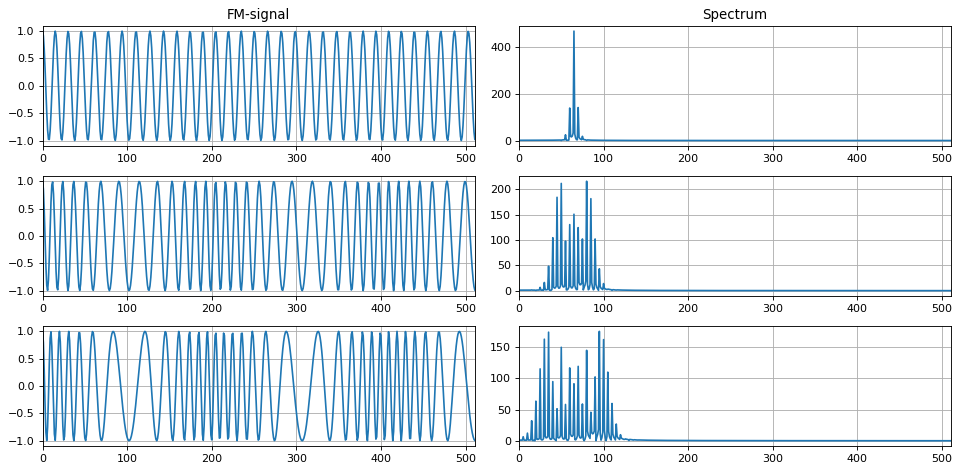

In [8]:
N = 1024
fs = 5            # Modulation frequency
fс = 65           # Carrier frequency
kd = [3, 23, 40]  # modulation coeff.

sig = [signal_fm(amp=1.0, kd=i, fc=fс, fs=fs, period=N) for i in kd]

# Calculate FFT
sft = np.abs(fft(sig, axis=1))

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(kd):
    plt.subplot(len(kd), 2, 2*i+1)
    if i == 0:
        plt.title('FM-signal')
    plt.plot(sig[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
    
    plt.subplot(len(kd), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

**Modulating and frequency-modulated signals**

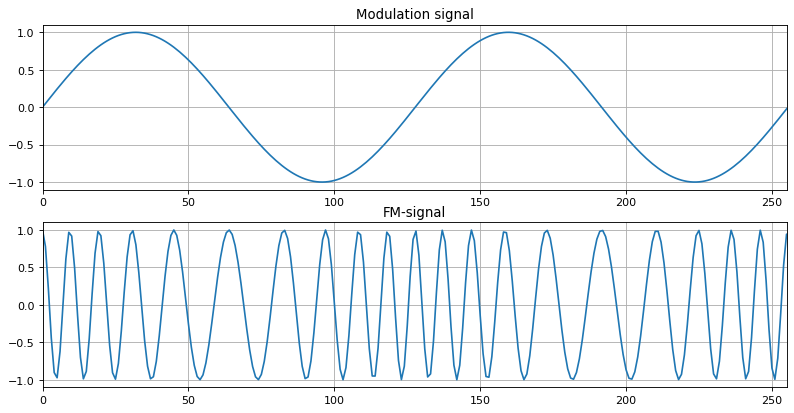

In [9]:
N = 512
sig = signal_fm(amp=1.0, kd=15, fc=40, fs=4, period=N)
smd = np.sin(4 * 2.0 * np.pi * np.linspace(0, 1, N))
                
plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Modulation signal')
plt.plot(smd)
plt.xlim([0, N//2-1])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('FM-signal')
plt.plot(sig)
plt.xlim([0, N//2-1])
plt.grid(True)

As you can see, the greater the frequency deviation, the wider the spectrum of the signal with angular modulation.
____

### Linear Frequency Modulation

Signals with linear frequency modulation (LFM) signals are a class of signals with frequency modulation, in which the frequency of the carrier signal changes linearly.

In radar problems, it is often required to obtain a given range resolution, defined as the minimum distance between two targets, at which the distance to each target is determined separately. This value is inversely proportional to the width of the spectrum of the signal. Therefore, it is necessary to increase the width of the spectrum to reduce the resolution.

An increase in the width of the signal spectrum can be achieved by reducing the signal duration. But this in turn leads to a decrease in signal energy and detection range. A compromise solution is the use of complex waveforms, in particular chirp signals.

The frequency change function is linear:

$ f(t) = f_{0} + k t $ 

Where:

- $ f_{0} = (F_{max} + F_{min}) / 2 $ - the central value of the carrier frequency.
- $ k = (F_{max} -F_{min}) / T_{c} $ - modulation coefficient
- $ T_c $ - signal duration

The main application of chirp signals is radar tasks. Broadband chirp signals provide a high range resolution without reducing the duration of the sent (probed) pulses.

The basic concept of the chirp signal is the signal base, which is characterized by the product of the width of the spectrum and the pulse duration of the signal.

$ \beta = \Delta f \cdot \tau $

If the base of the LFM signal $ \beta >> 1 $, then its spectrum tends to be rectangular, and the phase spectrum has a quadratic dependence on frequency. It is known that when passing through a matched filter, the LFM signal is compressed. This in turn gives rise to a narrow correlation peak of large amplitude.

To compress the LFM signals, a fast convolution operation is often used, which is based on the basic functional blocks of digital processing. These are the fast Fourier transform (FFT) kernels, complex multipliers and memory blocks containing a set of coefficients of the support function.

As you can see, the basic operations of digital processing are applicable to the tasks of radar.

The LFM signal is described by the formula:

$ s(t) = A cos(2\pi f_{0}t + \pi\beta t^{2}) $ 

Where

- $ A $ - signal amplitude.
- $ f_{0} $ - the initial value of the frequency,
- $ \beta $ - coefficient of chirp modulation,

Corresponding function in python:


In [10]:
def signal_chirp(amp=1.0, freq=0.0, beta=0.25, period=100, **kwargs):
    """
    Create Chirp signal

    Parameters
    ----------
    amp : float
        Signal magnitude
    beta : float
        Modulation bandwidth: beta < N for complex, beta < 0.5N for real
    freq : float or int
        Linear frequency of signal
    period : integer
        Number of points for signal (same as period)
    kwargs : bool
        Complex signal if is_complex = True
        Modulated by half-sine wave if is_modsine = True
    """
    is_complex = kwargs.get('is_complex', False)
    is_modsine = kwargs.get('is_modsine', False)

    t = np.linspace(0, 1, period)
    tt = np.pi * (freq * t + beta * t ** 2)
    
    if is_complex is True:
        res = amp * (np.cos(tt) + 1j * np.sin(tt))
    else:
        res = amp * np.cos(tt)

    if is_modsine is True:
        return res * np.sin(np.pi * t)
    return res

We plot the chirp signal for different values of the parameter $ \beta $. As you can see, with increasing parameter, the spectrum of the signal expands.

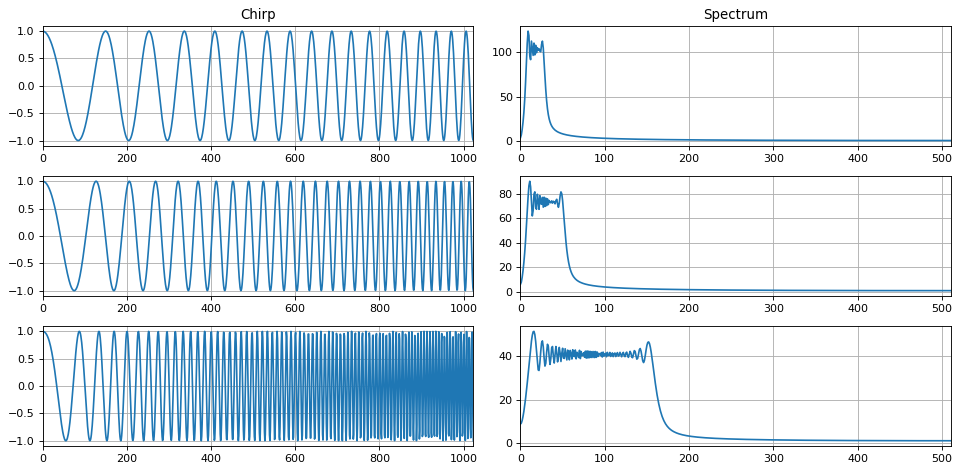

In [11]:
N = 1024
beta = [25, 49, 157]

schirp = [signal_chirp(amp=1, freq=10, beta=i, period=N) for i in beta]

# Calculate FFT
sft = np.abs(fft(schirp, axis=1))

plt.figure(figsize=(12, 6), dpi=80)
for i, freq in enumerate(kd):
    plt.subplot(len(kd), 2, 2*i+1)
    if i == 0:
        plt.title('Chirp')
    plt.plot(schirp[i])
    plt.xlim([0, N-1])
    plt.grid(True)
    
    plt.subplot(len(kd), 2, 2*i+2)
    if i == 0:
        plt.title('Spectrum')
    plt.plot(sft[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

#### Integrated chirp signal

Often, LFM pulses are additionally modulated by a sinusoidal envelope to achieve better spectral characteristics. You can also use a complex chirp signal.

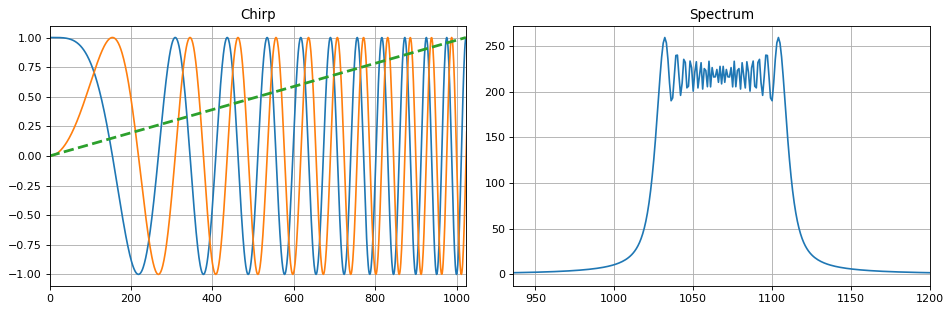

In [12]:
N = 2048
beta = 88

schirp = signal_chirp(amp=1, freq=0, beta=beta, period=N, is_complex=True)

# Calculate FFT
sft = np.abs(fftshift(fft(schirp)))

plt.figure(figsize=(12, 4), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Chirp')
plt.plot(np.real(schirp))
plt.plot(np.imag(schirp))
plt.plot(np.linspace(0, 1, N//2), '--', linewidth='2.5')
plt.xlim([0, N//2])
plt.grid(True)
    
plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.plot(sft)
plt.xlim([N//2-beta, N//2+2*beta])
plt.grid(True)
plt.tight_layout()

## Manipulation

In the theory of discrete message transmission, the process of converting a bit stream into a sequence of signal elements is called digital modulation or manipulation. In other words, for discrete (digital) systems, the process of modulating signals is called **manipulation**. As with analog signals, digital harmonic sequences can be manipulated in amplitude, phase, and frequency.

With low-frequency modulation (baseband modulation), these signals have the form of pulses of a given shape. For bandpass modulation, pulses of a given shape modulate a sine wave called a carrier frequency.

Types of manipulations:

- Amplitude (and quadrature amplitude) manipulation (AMn and QAM),
- Frequency Shift Keying (FMK),
- Phase Manipulation (PSK).

**Amplitude-shift keying** ASK - signal transformation at which the amplitude of the carrier oscillation changes stepwise. The most common quadrature amplitude manipulation of high orders (Quadrature amplitude modulation, QAM).

**Frequency Shift Keying** (Frequency-shift keying, FSK) - signal conversion, at which the carrier signal frequency jumps depending on the value of the digital message.

**Phase shift keying** (Phase-shift keying, PSK) - the process of signal conversion, in which the phase of the carrier oscillation changes stepwise. There is a large class of phase shift keyed signals: binary (BPSK, QPSK, 8-PSK, etc.)

### Amplitude Manipulation

With quadrature amplitude manipulation, the amplitude and phase of the signal change. This allows you to increase the amount of information transmitted. To represent manipulated signals, the concept of a **signal constellation** (constellation diagram) is introduced. It represents all possible values ​​of the complex amplitude of the manipulated signal in the form of points on the complex plane.

Ideally, the pulses of amplitude manipulation are rectangular, but in practice, smoother pulses are used due to the fact that to ensure strictly rectangular modulating pulses, an unacceptably wide band of the signal spectrum is required.

To ensure a high transmission speed and a qualitative level of reliability of reception, the use of signals only with amplitude modulation is not enough. In this regard, in practice, signals with modulation by several parameters have become widely used. The most widespread signals are **amplitude-phase shift keying**, which are also quadrature amplitude-modulated signals (QAM). They are obtained by combining the methods of amplitude and phase manipulation, which allows to increase the number of transmitted bits in one symbol, and to increase noise immunity compared to using only AMN or FMN oscillations.

Below is an example of the simplest amplitude manipulation of a harmonic signal. The sequence of characters is set using a random number generator of zeros and ones.

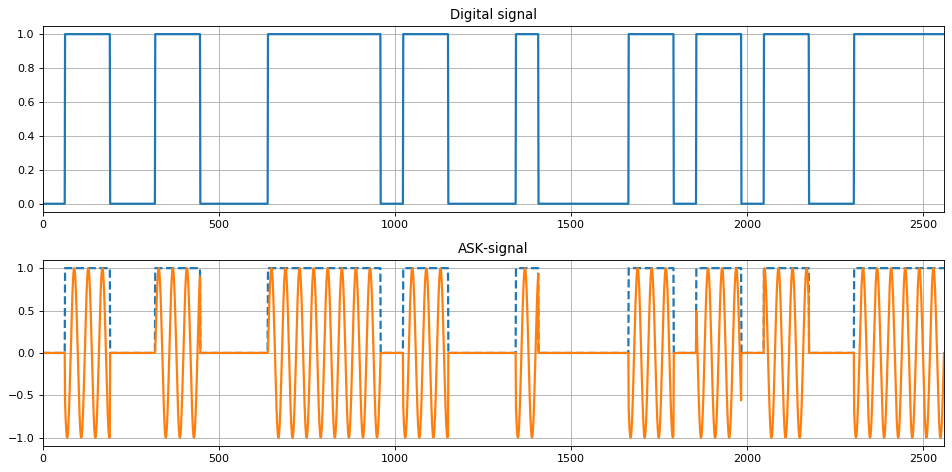

In [13]:
N = 64

# Random array of ones and zeros
np.random.seed(6)
mod_rnd = np.random.randint(0, 2, 40)
# Repeat number of ones and zeros
mod_ask = np.repeat(mod_rnd, repeats=N)

# ASK signal
M = mod_ask.size
sig_ask = mod_ask * np.sin(64 * 2.0 * np.pi * np.linspace(0, 1, M))

# PLot results
plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Digital signal')
plt.plot(mod_ask, color='C0', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('ASK-signal')
plt.plot(mod_ask, '--', color='C0', linewidth=2.0)
plt.plot(sig_ask, '-', color='C1', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)
plt.tight_layout()

### Frequency Shift Keying

For FSK signals, the frequency is a variable parameter, with the amplitude and initial phase remaining unchanged. Logical levels '0' and '1' are assigned two frequency values. They are selected from the condition of orthogonality on the interval of the duration of the signal T.

The principle of the formation of FSK signals is quite simple. There are several oscillators that generate oscillations at different frequencies. A modulating digital signal switches the signal selection multiplexer from one of the generators. Thus, the package is formed in the form of signals of different frequencies. For example, two frequencies are used for binary frequency manipulation. Two positions are encoded with a single-bit number: "0" corresponds to the frequency from the first generator, "1" to the frequency from the second generator.

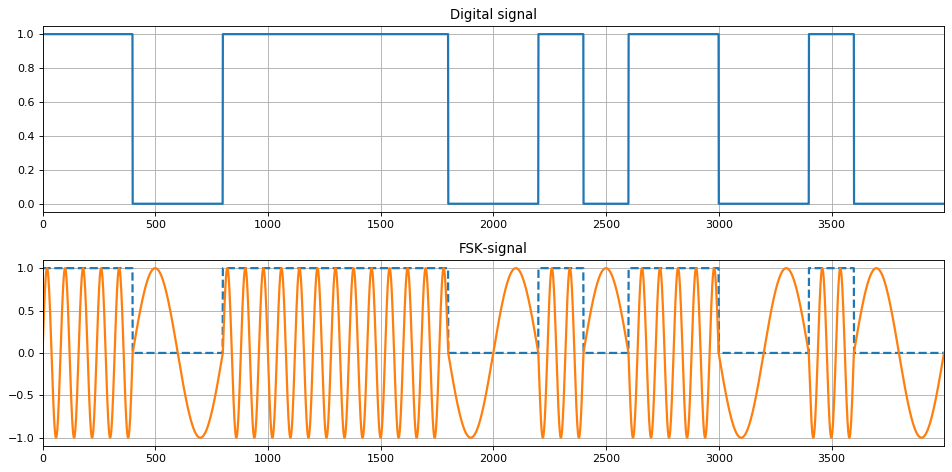

In [14]:
N = 200
# Random array of ones and zeros
np.random.seed(1)
mod_rnd = np.random.randint(0, 2, 20)
# Repeat number of ones and zeros
mod_fsk = np.repeat(mod_rnd, repeats=N)

# FSK signal
M = mod_fsk.size
mod_frq = np.zeros(M)

# Set freq 'bits' (0, 1)
mod_frq[mod_fsk == 0] = 10
mod_frq[mod_fsk == 1] = 50

sig_fsk = np.sin(mod_frq *  2.0 * np.pi * np.linspace(0, 1, M))

# PLot results
plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Digital signal')
plt.plot(mod_fsk, color='C0', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('FSK-signal')
plt.plot(mod_fsk, '--', color='C0', linewidth=2.0)
plt.plot(sig_fsk, '-', color='C1', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)
plt.tight_layout()

### Phase Manipulation

For such signals, the phase is the information parameter, and to simplify the implementation of digital systems, the logical value '1' corresponds to the zero initial phase, and '0' corresponds to the opposite value $ \pi $ (for two-bit phase manipulation). Logic levels are transmitted on a single carrier frequency. In the literature, such PSM oscillations are often called FM-2 signals (BPSK, Binary phase-shift keying), where 2 indicates the number of phase variations.

It should be noted that FM-2 signals do not allow to obtain high information transfer rates over a limited-band communication channel, but are most noise-resistant. The simplest FM-2 signal did not find practical application because of the too wide band and possible random phase jump by $ \pi $, which is called the "reverse operation mode".

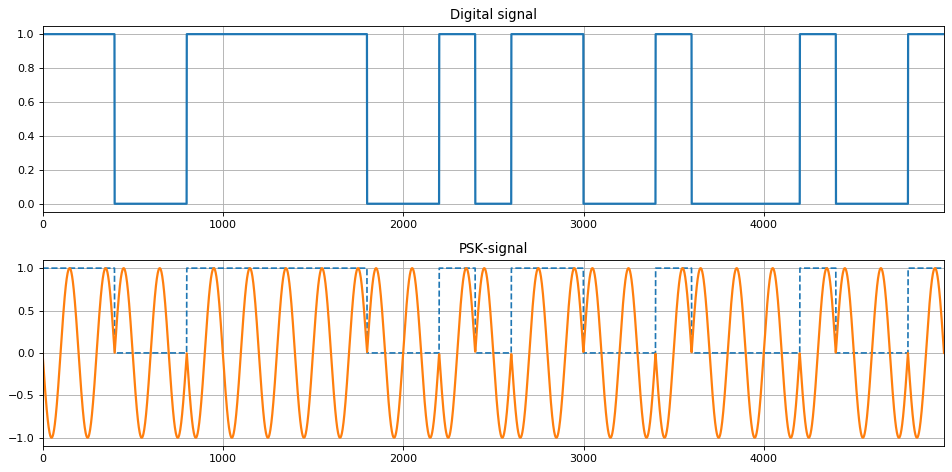

In [15]:
N = 200
# Random array of ones and zeros
np.random.seed(1)
mod_rnd = np.random.randint(0, 2, 25)
# Repeat number of ones and zeros
mod_psk = np.repeat(mod_rnd, repeats=N)

# PSK signal
M = mod_psk.size

sig_psk = np.sin(25 * 2.0 * np.pi * np.linspace(0, 1, M) + np.pi * mod_psk)

# PLot results
plt.figure(figsize=(12, 6), dpi=80)
plt.subplot(2, 1, 1)
plt.title('Digital signal')
plt.plot(mod_psk, color='C0', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('PSK-signal')
plt.plot(mod_psk, '--', color='C0', linewidth=1.5)
plt.plot(sig_psk, '-', color='C1', linewidth=2.0)
plt.xlim([0, M-1])
plt.grid(True)
plt.tight_layout()

The main disadvantage of signals with one-bit manipulation is the irrational distribution of energy in the frequency range. Due to the abrupt change in the varied parameters at the transitions of the symbols, most of the energy is contained outside the main lobe of the spectrum, which leads to out-of-band radiation.

To avoid this, signals with a continuous phase (SNF) began to be applied. There are three main methods by which signals are constructed with a relatively smooth change in the signal parameters at the transition boundaries: amplitude, phase, and a combination of the two previous ones, amplitude-phase. The amplitude method allows to reduce a sharp change in the signal level at the time of the phase jump of the oscillation to zero. The phase method eliminates phase jumps in which a false transition situation is most likely. The amplitude-phase method combines the properties of the two previous ones, and the amplitude method limits the logical levels, smoothing out noise, and the phase method is designed to suppress the side lobes of the spectrum.

A detailed study of the signals presented above, as well as consideration of more complex signals and types of modulation and manipulation, is beyond the scope of this course.